In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 1 Load Dataset
df = pd.read_csv("netflix_titles.csv.csv")
print("Dataset Loaded ")
print(df.head())


Dataset Loaded 
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 

In [3]:
# 2 Select relevant columns
df = df[['type', 'description']].dropna()


In [4]:
# 3 Encode target labels (Movie=0, TV Show=1)
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [6]:
# 4 Text preprocessing
texts = df['description'].values
labels = df['type_encoded'].values

In [7]:
# 5️ Tokenize text data
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [8]:
# 6️ Split data
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [9]:
# 7️ Build RNN Model
model = Sequential([
    Embedding(vocab_size, 64, input_length=100),
    SimpleRNN(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# 8️ Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# 9️ Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6952 - loss: 0.6176 - val_accuracy: 0.6948 - val_loss: 0.6179
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6987 - loss: 0.6133 - val_accuracy: 0.6948 - val_loss: 0.6251
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6987 - loss: 0.6150 - val_accuracy: 0.6948 - val_loss: 0.6157
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6987 - loss: 0.6130 - val_accuracy: 0.6948 - val_loss: 0.6190
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6982 - loss: 0.6212 - val_accuracy: 0.6948 - val_loss: 0.6441


In [14]:
#10 Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {acc:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

 Test Accuracy: 0.6890


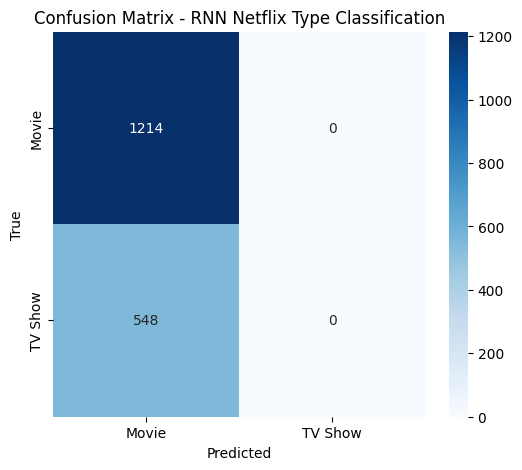

In [15]:
# 11 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - RNN Netflix Type Classification")
plt.show()

In [16]:
# 12 Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))


📊 Classification Report:

              precision    recall  f1-score   support

       Movie       0.69      1.00      0.82      1214
     TV Show       0.00      0.00      0.00       548

    accuracy                           0.69      1762
   macro avg       0.34      0.50      0.41      1762
weighted avg       0.47      0.69      0.56      1762



C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi